In [1]:
import os

import cv2

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
DATA_PATH = "../data/sunspots/"
TEST_FILE = os.path.join(DATA_PATH, "sunspots_1024_20130405.jpg")

In [3]:
img = mpimg.imread(TEST_FILE)
img.shape

(1024, 1024, 3)

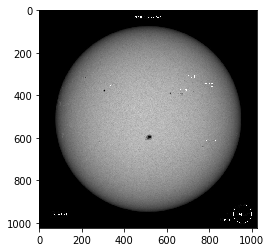

In [4]:
plt.imshow(img)

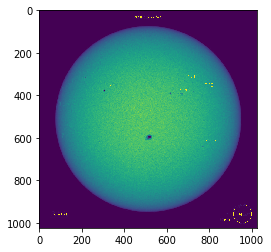

In [5]:
plt.imshow(img[:, :, 0])

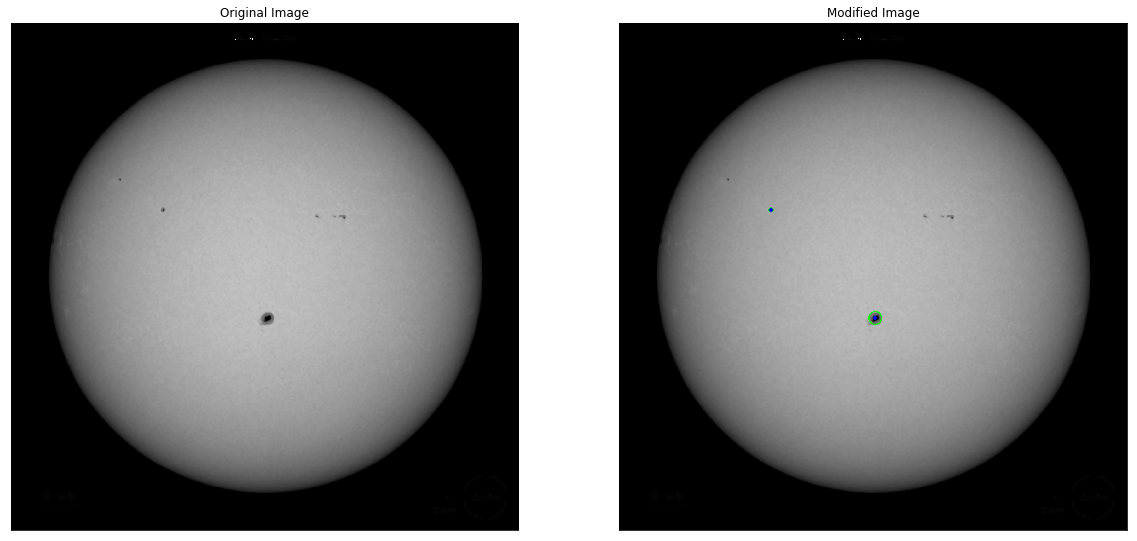

In [7]:
img = cv2.imread(TEST_FILE,0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,10,
                            param1=50,param2=12,minRadius=0,maxRadius=20)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

f, axs = plt.subplots(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cimg, cmap = 'gray')
plt.title('Modified Image'), plt.xticks([]), plt.yticks([])

plt.show()

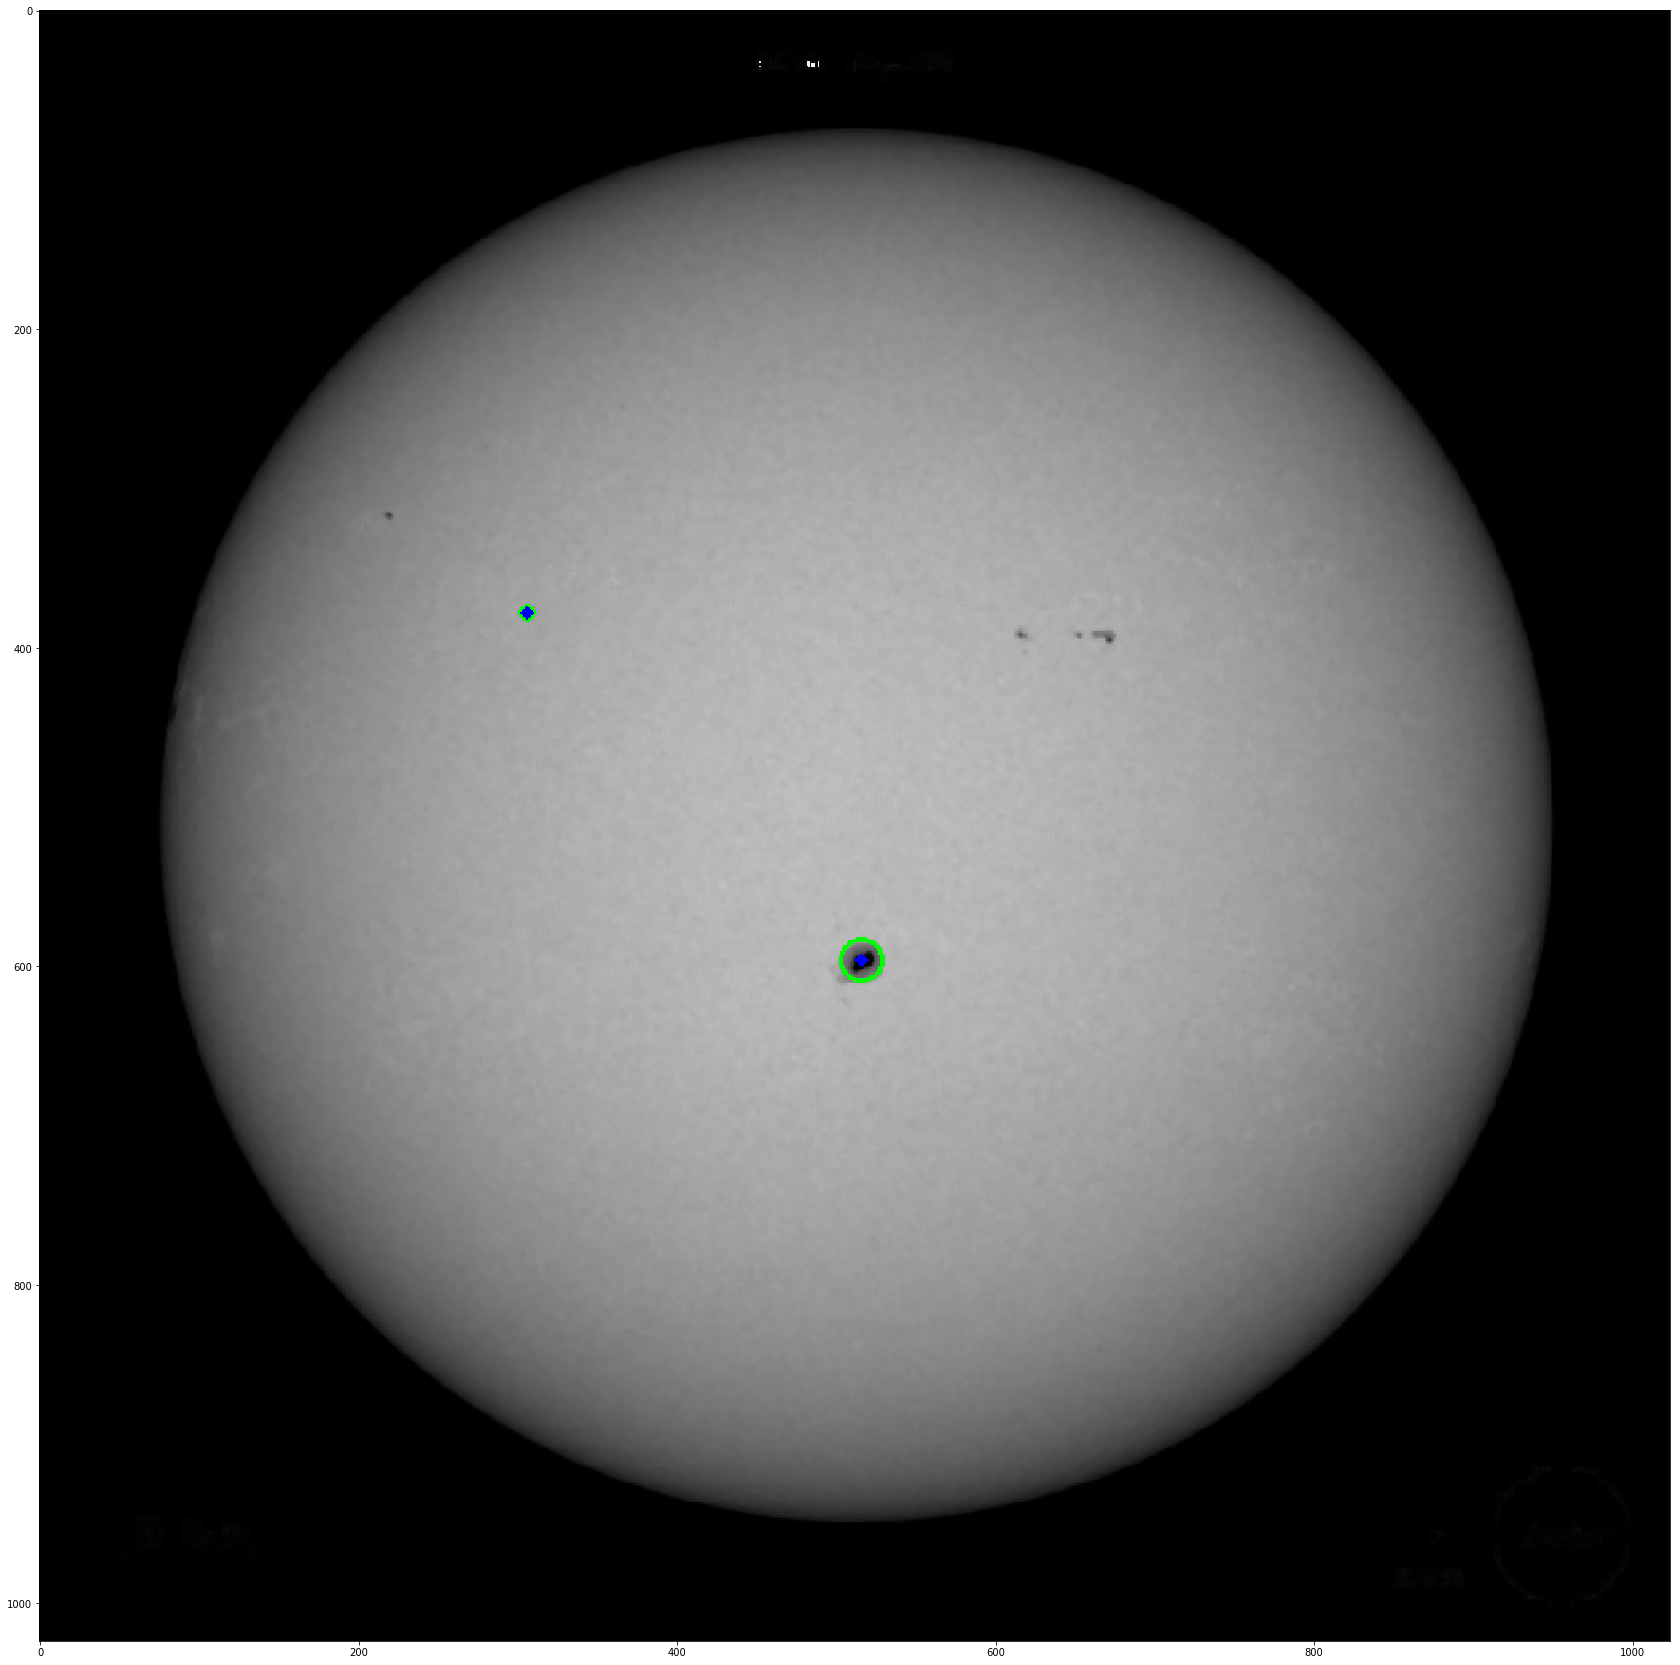

In [8]:
plt.figure(figsize=(30,30))
plt.imshow(cimg, cmap = 'gray')